# **CIS 520: Machine Learning, Fall 2020**
# **Week 7, Worksheet 2 (Part 2)**
## **SVD**


- **Content Creator:** Hanwen Zhang
- **Content Checkers:** Tejas Srivastava; Margaret Ji
- **Reference:**
 https://github.com/ageron/handson-ml/blob/master/math_linear_algebra.ipynb 
 https://www.analyticsvidhya.com/blog/2019/08/5-applications-singular-value-decomposition-svd-data-science/
 https://towardsdatascience.com/singular-value-decomposition-example-in-python-dab2507d85a0

In [ ]:
import numpy.linalg as LA
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

## Singular Value Decomposition
It turns out that any $m \times n$ matrix $M$ can be decomposed into the dot product of three simple matrices:
* a rotation matrix $U$ (an $m \times m$ orthogonal matrix)
* a scaling & projecting matrix $\Sigma$ (an $m \times n$ diagonal matrix)
* and another rotation matrix $V^T$ (an $n \times n$ orthogonal matrix)

$M = U \cdot \Sigma \cdot V^{T}$

For example, let's decompose the shear transformation:

In [ ]:
F_shear = np.array([
        [1, 1.5],
        [0, 1]
    ])
U, S_diag, V_T = LA.svd(F_shear) # note: in python 3 you can rename S_diag to Σ_diag
U

array([[ 0.89442719, -0.4472136 ],
       [ 0.4472136 ,  0.89442719]])

In [ ]:
S_diag

array([2. , 0.5])

Note that this is just a 1D array containing the diagonal values of Σ. To get the actual matrix Σ, we can use NumPy's `diag` function:

In [ ]:
S = np.diag(S_diag)
S

array([[2. , 0. ],
       [0. , 0.5]])

Now let's check that $U \cdot \Sigma \cdot V^T$ is indeed equal to `F_shear`:

In [ ]:
U.dot(np.diag(S_diag)).dot(V_T)

array([[ 1.00000000e+00,  1.50000000e+00],
       [-1.25949234e-17,  1.00000000e+00]])

In [ ]:
F_shear

array([[1. , 1.5],
       [0. , 1. ]])

It worked like a charm. Let's apply these transformations one by one (in reverse order) on the unit square to understand what's going on. First, let's apply the first rotation $V^T$:

In [ ]:
def plot_transformation(P_before, P_after, text_before, text_after, axis = [0, 5, 0, 4], arrows=False):
    if arrows:
        for vector_before, vector_after in zip(P_before.T, P_after.T):
            plot_vector2d(vector_before, color="blue", linestyle="--")
            plot_vector2d(vector_after, color="red", linestyle="-")
    plt.gca().add_artist(Polygon(P_before.T, alpha=0.2))
    plt.gca().add_artist(Polygon(P_after.T, alpha=0.3, color="r"))
    plt.text(P_before[0].mean(), P_before[1].mean(), text_before, fontsize=18, color="blue")
    plt.text(P_after[0].mean(), P_after[1].mean(), text_after, fontsize=18, color="red")
    plt.axis(axis)
    plt.grid()


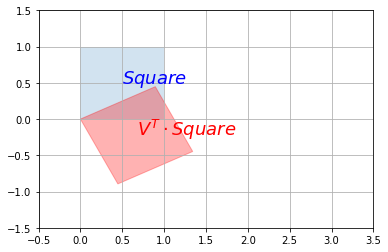

In [ ]:
Square = np.array([
        [0, 0, 1, 1],
        [0, 1, 1, 0]
    ])
plot_transformation(Square, V_T.dot(Square), "$Square$", "$V^T \cdot Square$",
                    axis=[-0.5, 3.5 , -1.5, 1.5])
plt.show()

Now let's rescale along the vertical and horizontal axes using  Σ :

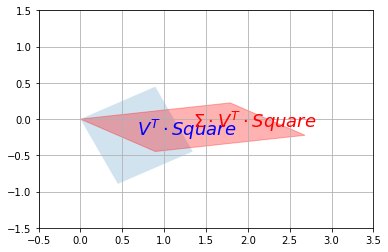

In [ ]:
plot_transformation(V_T.dot(Square), S.dot(V_T).dot(Square), "$V^T \cdot Square$", "$\Sigma \cdot V^T \cdot Square$",
                    axis=[-0.5, 3.5 , -1.5, 1.5])
plt.show()

Finally, we apply the second rotation $U$:

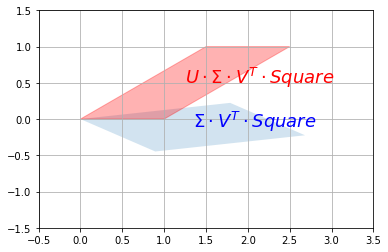

In [ ]:
plot_transformation(S.dot(V_T).dot(Square), U.dot(S).dot(V_T).dot(Square),"$\Sigma \cdot V^T \cdot Square$", "$U \cdot \Sigma \cdot V^T \cdot Square$",
                    axis=[-0.5, 3.5 , -1.5, 1.5])
plt.show()

And we can see that the result is indeed a shear mapping of the original unit square.

# The Moore Penrose Pseudoinverse
The following can be used to find the pseudoinverse according to your lecture:
$$
\boldsymbol{A}^{+}=\boldsymbol{V} \boldsymbol{D}^{+} \boldsymbol{U}^{T}
$$
with **U**, **D** and **V** respectively the left singular vectors, the singular values and the right singular vectors of **A**.

We will see an example of this.

First, create a non square matrix **A**, calculate its singular value decomposition and its pseudoinverse.

In [ ]:
A = np.array([[7, 2], [3, 4], [5, 3]])
U, D, V = np.linalg.svd(A)


D_plus = np.zeros((A.shape[0], A.shape[1])).T
D_plus[:D.shape[0], :D.shape[0]] = np.linalg.inv(np.diag(D))

A_plus = V.T.dot(D_plus).dot(U.T)
A_plus

array([[ 0.16666667, -0.10606061,  0.03030303],
       [-0.16666667,  0.28787879,  0.06060606]])

We can now check with the pinv() function from Numpy that the pseudoinverse is correct:

In [ ]:
np.linalg.pinv(A)

array([[ 0.16666667, -0.10606061,  0.03030303],
       [-0.16666667,  0.28787879,  0.06060606]])

It looks good! We can now check that it is really the near inverse of **A**. Since we know that
$$
\boldsymbol{A}^{-1} \boldsymbol{A}=\boldsymbol{I}_{\boldsymbol{n}}
$$
with 
$$
\boldsymbol{I}_{2}=\left[\begin{array}{ll}
1 & 0 \\
0 & 1
\end{array}\right]
$$
(Notice that here n=2)

In [ ]:
A_plus.dot(A)

array([[1.00000000e+00, 2.70616862e-16],
       [2.28983499e-16, 1.00000000e+00]])

This is not bad! This is almost the identity matrix!
A difference with the real inverse is that 
$$
\boldsymbol{A}^{+} \boldsymbol{A} \approx \boldsymbol{I} \text { but } \boldsymbol{A A}^{+} \neq \boldsymbol{I}
$$
Another way of computing the pseudoinverse is to use this formula:
$$
\left(A^{T} A\right)^{-1} A^{T}
$$
The result is less acurate than the SVD method and Numpy *pinv()* uses the SVD ( [cf Numpy doc](https://numpy.org/doc/stable/reference/generated/numpy.linalg.pinv.html)). Here is an example from the same matrix **A**.

In [ ]:
A_plus_1 = np.linalg.inv(A.T.dot(A)).dot(A.T)
A_plus_1

array([[ 0.16666667, -0.10606061,  0.03030303],
       [-0.16666667,  0.28787879,  0.06060606]])

In this case the result is the same as with the SVD way.

# The relationship between eigenvalues and singular values

Again, we will use the same **A** matrix as above.

In [ ]:
A = np.array([[7, 2], [3, 4], [5, 3]])
U, D, V = np.linalg.svd(A)
evs, evmat = np.linalg.eig(A.T @ A)
print('singular values:', D)
print('eigenvalues:',evs)
print('squared singular values:',D**2)

singular values: [10.25142677  2.62835484]
eigenvalues: [105.09175083   6.90824917]
squared singular values: [105.09175083   6.90824917]


From the result, we can see that the eigenvalues of **(A^T)A** is equal to squared singualr values of **A**. It matches the conclusion you get during the lecture.


## **Applications of Singular Value Decomposition (SVD)**
You just need to know four things to understand the applications:

1.SVD is the decomposition of a matrix A into 3 matrices – **U, S, and V**

2.**S** is the diagonal matrix of singular values. Think of **singular values** as the importance values of different features in the matrix

3.The **rank** of a matrix is a measure of the unique information stored in a matrix. Higher the rank, more the information

4.**Eigenvectors** of a matrix are directions of maximum spread or variance of data

In most of the applications, the basic principle of [Dimensionality Reduction](https://en.wikipedia.org/wiki/Dimensionality_reduction) is used. You want to reduce a high-rank matrix to a low-rank matrix while preserving important information.

 In this worksheet, we will discuss several of these applications of SVD. 

## ''Thin'' SVD
We’ll attempt to classify handwritten digits. Fortunately, the *scikit-learn* library provides a wrapper function for importing the dataset into our program.

In [ ]:
import numpy as np
from sklearn.datasets import load_digits
from matplotlib import pyplot as plt
from sklearn.decomposition import TruncatedSVD
float_formatter = lambda x: "%.2f" % x
np.set_printoptions(formatter={'float_kind':float_formatter})
from sklearn.ensemble import RandomForestClassifier

The dataset contains 1797 8x8 images. If you specify *return_X_y=True* the function will return the pixels as a one dimensional array.

In [ ]:
X, y = load_digits(return_X_y=True)
print(X.shape)
print(y)

(1797, 64)
[0 1 2 ... 8 9 8]


To view the 16th image:

[0.00 0.00 0.00 8.00 15.00 1.00 0.00 0.00 0.00 0.00 0.00 12.00 14.00 0.00
 0.00 0.00 0.00 0.00 3.00 16.00 7.00 0.00 0.00 0.00 0.00 0.00 6.00 16.00
 2.00 0.00 0.00 0.00 0.00 0.00 7.00 16.00 16.00 13.00 5.00 0.00 0.00 0.00
 15.00 16.00 9.00 9.00 14.00 0.00 0.00 0.00 3.00 14.00 9.00 2.00 16.00
 2.00 0.00 0.00 0.00 7.00 15.00 16.00 11.00 0.00]


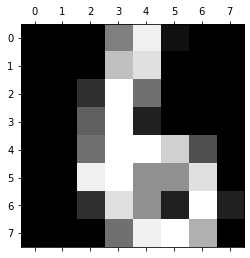

In [ ]:
image = X[16]
print(image)
image = image.reshape((8, 8))
plt.matshow(image, cmap = 'gray')

Next, we’ll use Singular Value Decomposition to see whether we are able to reconstruct the image using only 2 features for each row. The **s** matrix returned by the function must be converted into a diagonal matrix using the *diag* method. By default, *diag* will create a matrix that is n x n, relative to the original matrix. This causes a problem as the size of the matrices no longer follow the rule of matrix multiplication where the number of columns in a matrix must match the number of rows in the other matrix. Therefore, we create a new m x n matrix and populate the first n x n part of it with the diagonal matrix.

[[0.00 -0.00 3.65 10.74 7.36 2.46 3.14 0.16]
 [0.00 -0.00 4.34 13.68 8.09 1.14 2.16 0.16]
 [0.00 0.00 4.49 15.21 7.57 -0.93 0.36 0.13]
 [0.00 0.00 4.05 14.27 6.42 -1.95 -0.65 0.10]
 [0.00 -0.00 6.41 16.42 14.81 9.29 9.92 0.37]
 [0.00 -0.00 6.31 15.79 14.85 9.87 10.40 0.37]
 [0.00 -0.00 4.99 12.65 11.63 7.49 7.95 0.29]
 [0.00 -0.00 4.20 6.69 12.78 14.26 13.73 0.38]]


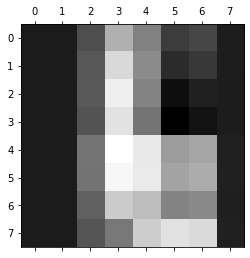

In [ ]:
U, s, V_T = np.linalg.svd(image)
S = np.zeros((image.shape[0], image.shape[1]))
S[:image.shape[0], :image.shape[0]] = np.diag(s)
n_component = 2
S = S[:, :n_component]
V_T = V_T[:n_component, :]
AA = U.dot(S.dot(V_T))
print(AA)
plt.matshow(AA, cmap = 'gray')

We can get the reduced feature space by taking the dot product of the **U** and **S** matrices.

In [ ]:
print(U.dot(S))

[[13.76 -3.06]
 [15.49 -6.12]
 [14.96 -9.27]
 [12.95 -9.89]
 [26.70 1.50]
 [26.63 2.48]
 [20.91 1.52]
 [21.59 12.31]]


Now, instead, we can use 20/64 features.

[[0.00 0.00 -0.00 8.00 15.00 1.00 0.00 0.00]
 [0.00 -0.00 0.00 12.00 14.00 0.00 0.00 0.00]
 [0.00 0.00 3.00 16.00 7.00 0.00 0.00 0.00]
 [0.00 0.00 6.00 16.00 2.00 0.00 0.00 0.00]
 [0.00 -0.00 7.00 16.00 16.00 13.00 5.00 0.00]
 [0.00 -0.00 15.00 16.00 9.00 9.00 14.00 0.00]
 [0.00 -0.00 3.00 14.00 9.00 2.00 16.00 2.00]
 [0.00 -0.00 0.00 7.00 15.00 16.00 11.00 0.00]]


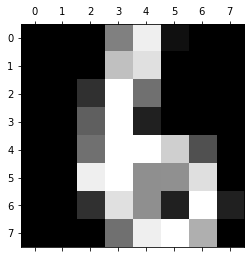

In [ ]:
U, s, V_T = np.linalg.svd(image)
S = np.zeros((image.shape[0], image.shape[1]))
S[:image.shape[0], :image.shape[0]] = np.diag(s)
n_component = 20
S = S[:, :n_component]
V_T = V_T[:n_component, :]
AA = U.dot(S.dot(V_T))
print(AA)
plt.matshow(AA, cmap = 'gray')

In [ ]:
print(U.dot(S))

[[13.76 -3.06 8.91 1.85 2.91 0.03 -0.00 0.00]
 [15.49 -6.12 7.49 2.31 1.07 -0.18 0.00 0.00]
 [14.96 -9.27 0.54 -0.20 -1.96 -0.19 0.00 0.00]
 [12.95 -9.89 -4.42 -2.40 -2.28 -0.03 -0.00 0.00]
 [26.70 1.50 3.27 -5.38 -0.34 0.47 0.00 0.00]
 [26.63 2.48 -10.36 -2.30 3.30 -0.21 0.00 0.00]
 [20.91 1.52 -5.36 8.99 -1.02 0.24 -0.00 0.00]
 [21.59 12.31 5.15 -0.46 -2.55 -0.29 -0.00 0.00]]


### Truncated SVD in scikit-learn

In most common applications, we do not want to find the complete matrices U, S and V. We will see this in **dimensionality reduction** cases.

We are ultimately going to trim our matrices, so why find the complete matrices in the first place?

In such cases, it is better to use **TruncatedSVD** from **sklearn decomposition.** You specify the number of features you want in the output as the **n_components** parameter. **n_components** should be **strictly less** than the number of features in the input matrix:

In [ ]:
import numpy as np
from sklearn.decomposition import TruncatedSVD

A = np.array([[-1, 2, 0, 3], [2, 0, -2, 2], [0, -2, 1, 1]])
print("Original Matrix:")
print(A)

svd =  TruncatedSVD(n_components = 2)
A_transf = svd.fit_transform(A)
V=svd.components_

print("Singular values:")
print(svd.singular_values_)

print("Transformed Matrix after reducing to 2 features:")
print(A_transf @ V)

Original Matrix:
[[-1  2  0  3]
 [ 2  0 -2  2]
 [ 0 -2  1  1]]
Singular values:
[4.14 3.00]
Transformed Matrix after reducing to 2 features:
[[-0.93 2.28 -0.21 2.78]
 [1.95 -0.18 -1.86 2.14]
 [0.39 -0.43 -0.18 -0.25]]


Compared with ''Thin'' SVD:

In [ ]:
A = np.array([[-1, 2, 0, 3], [2, 0, -2, 2], [0, -2, 1, 1]])
print("Original Matrix:")
print(A)

U, s, V_T = np.linalg.svd(A)
S = np.zeros((A.shape[0], A.shape[1]))
S[:A.shape[0], :A.shape[0]] = np.diag(s)
n_component = 2
S = S[:, :n_component]
print("Singular values:")
print(S)
V_T = V_T[:n_component, :]
AA = U.dot(S.dot(V_T))
print("Transformed Matrix after reducing to 2 features:")
print(AA)


Original Matrix:
[[-1  2  0  3]
 [ 2  0 -2  2]
 [ 0 -2  1  1]]
Singular values:
[[4.14 0.00]
 [0.00 3.00]
 [0.00 0.00]]
Transformed Matrix after reducing to 2 features:
[[-0.93 2.28 -0.21 2.78]
 [1.95 -0.18 -1.86 2.14]
 [0.39 -0.43 -0.18 -0.25]]


## Randomized SVD in scikit-learn
Randomized SVD gives the same results as Truncated SVD and has a **faster** computation time. While Truncated SVD uses an exact solver ARPACK, Randomized SVD uses approximation techniques.

In [ ]:
import numpy as np
from sklearn.utils.extmath import randomized_svd

A = np.array([[-1, 2, 0, 3], [2, 0, -2, 2], [0, -2, 1, 1]])
u, s, vt = randomized_svd(A, n_components = 2)

print("Left Singular Vectors:")
print(u)

print("Singular Values:") 
print(np.diag(s))

print("Right Singular Vectors:") 
print(vt)

print("Transformed Matrix after reducing to 2 features:")
print(u @ np.diag(s) @ vt)

Left Singular Vectors:
[[0.79 -0.59]
 [0.61 0.78]
 [-0.07 0.20]]
Singular Values:
[[4.14 0.00]
 [0.00 3.00]]
Right Singular Vectors:
[[0.10 0.42 -0.31 0.85]
 [0.72 -0.52 -0.46 0.00]]
Transformed Matrix after reducing to 2 features:
[[-0.93 2.28 -0.21 2.78]
 [1.95 -0.18 -1.86 2.14]
 [0.39 -0.43 -0.18 -0.25]]


## SVD for Image Compression

How many times have we faced this issue? We love clicking images with our smartphone cameras and saving random photos off the web. And then one day – no space! Image compression helps deal with that headache.

It minimizes the size of an image in bytes to an acceptable level of quality. This means that you are able to store more images in the same disk space as compared to before.

Image compression takes advantage of the fact that only a few of the singular values obtained after SVD are large. You can trim the three matrices based on the first few singular values and obtain a compressed approximation of the original image. Some of the compressed images are nearly indistinguishable from the original by the human eye.

In [ ]:
!wget https://cdn.pixabay.com/photo/2017/03/27/16/50/beach-2179624_960_720.jpg

--2020-10-21 21:43:46--  https://cdn.pixabay.com/photo/2017/03/27/16/50/beach-2179624_960_720.jpg
Resolving cdn.pixabay.com (cdn.pixabay.com)... 104.18.21.183, 104.18.20.183, 2606:4700::6812:14b7, ...
Connecting to cdn.pixabay.com (cdn.pixabay.com)|104.18.21.183|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 164810 (161K) [image/jpeg]
Saving to: ‘beach-2179624_960_720.jpg’

beach-2179624_960_7 100%[===================>] 160.95K  --.-KB/s    in 0.009s  

2020-10-21 21:43:46 (17.5 MB/s) - ‘beach-2179624_960_720.jpg’ saved [164810/164810]



(638, 638) (638,) (960, 960)


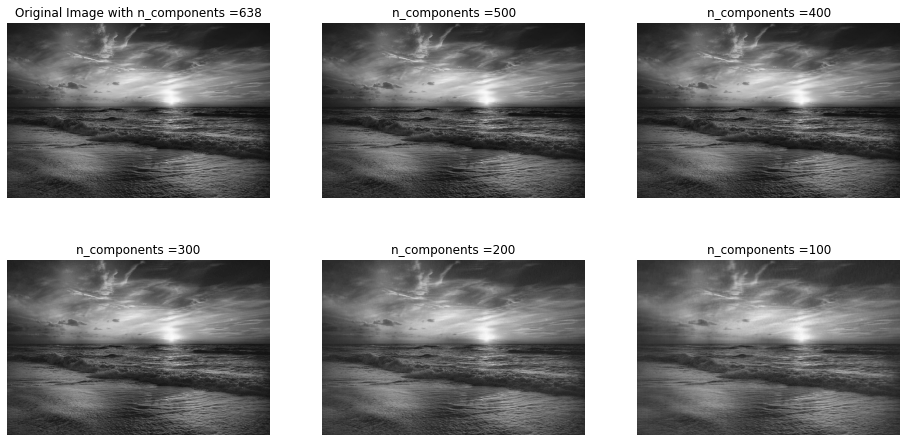

In [ ]:
# get the image from "https://cdn.pixabay.com/photo/2017/03/27/16/50/beach-2179624_960_720.jpg"
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

# read image in grayscale
img = cv2.imread('beach-2179624_960_720.jpg', 0)

# obtain svd
U, S, V = np.linalg.svd(img)

# inspect shapes of the matrices
print(U.shape, S.shape, V.shape)

# plot images with different number of components
comps = [638, 500, 400, 300, 200, 100]

plt.figure(figsize = (16, 8))
for i in range(6):
  low_rank = U[:, :comps[i]] @ np.diag(S[:comps[i]]) @ V[:comps[i], :]
  if(i  == 0):
     plt.subplot(2, 3, i+1), plt.imshow(low_rank, cmap = 'gray'), plt.axis('off'), plt.title("Original Image with n_components =" + str(comps[i]))
  else:
     plt.subplot(2, 3, i+1), plt.imshow(low_rank, cmap = 'gray'), plt.axis('off'), plt.title("n_components =" + str(comps[i]))